# Project:  TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitation">Limitation</a></li>
</ul>

# INTRODUCTION

## Dataset Description

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

This data set contains 21 columns :

* id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj

Most of the columns names self explain the content of the column


## Research Questions for Analysis
1. Top 10 movies with the highest profit
2. Top 5 most released movie genre
3. Top 5 cast in number of features
4. Top 10 companies with highest movie production
5. Top 10 Director with the highest movie production
6. Top 10 movies with High Revenue generation
7. Top 10 directors that generated the highest revenue in terms of movie production.
8. Number of movie released across the year
9. Top 10 most rated movies
10. Changes in Revenue, Budget and profit across the year

In [1]:
#import the important libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
from collections import Counter
%matplotlib inline

# Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

In [2]:
#import the dataset for this analysis

movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check the shape to determine the dimension of the dataset for analysis sake

movie_df.shape

(10866, 21)

In [4]:
#check the info inorder to display a concise summary of the dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#check the features and the variables types for proper cleaning and adjustment for analysis

movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Data Cleaning

In [6]:
#check for duplicate rows

sum(movie_df.duplicated())

1

In [7]:
# Selecting duplicate rows in occurrence based on all columns

duplicate = movie_df[movie_df.duplicated(keep = False)]
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#Drop all duplicates rows

movie_df.drop_duplicates(inplace = True)
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [9]:
#checkthe dimension to know how many rows was dropped

movie_df.shape

(10865, 21)

In [10]:
movie_df.info()

# From the information below, we can see that some columns have alot of missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [11]:
#Check for null values across the dataset

movie_df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
percent_missing = movie_df.isnull().sum() * 100 / len(movie_df)
missing_info_df = pd.DataFrame({'column_name' : movie_df.columns,'percent_missing':percent_missing,'type': movie_df.dtypes})
missing_info_df.sort_values(by='percent_missing', ascending = False)

# From the information below, it can be observed that the homepage column, tagline column and 
# keyword column have the higest percentage of missing values with homepage column being the highest. 
# Since the three columns are not needed in the analysis, they are removed.

,column_name,percent_missing,type
homepage,homepage,72.977451,object
tagline,tagline,25.991717,object
keywords,keywords,13.741371,object
production_companies,production_companies,9.479982,object
cast,cast,0.699494,object
director,director,0.404970,object
genres,genres,0.211689,object
imdb_id,imdb_id,0.092039,object
overview,overview,0.036815,object
budget_adj,budget_adj,0.000000,float64


In [13]:
# The missing values in production companies column are filled with their frequency

Prodfreq = movie_df['production_companies'].value_counts().idxmax()

In [14]:
movie_df['production_companies'].value_counts()

# It can be seen that paramount pictures is the most common type

Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      76
Metro-Goldwyn-Mayer (MGM)                 72
                                        ... 
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Mulmur Feed Company                        1
Chaotic Rampage American Pictures          1
Norm-Iris                                  1
Name: production_companies, Length: 7445, dtype: int64

In [15]:
# The missing values in cast column are filled with their frequency

castfreq = movie_df['cast'].value_counts().idxmax()

In [16]:
# It can be seen that louis C.K  is the most common type

movie_df['cast'].value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
George Carlin                                                                     3
Pierre Coffin                                                                     3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

In [17]:
dfreq = movie_df['director'].value_counts().idxmax()

In [18]:
movie_df['director'].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [19]:
gfreq = movie_df['genres'].value_counts().idxmax()

In [20]:
movie_df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [21]:
# Now, we wil replace the missing values by the frequent production company

movie_df["director"].replace(np.nan, dfreq, inplace=True)
movie_df["production_companies"].replace(np.nan, Prodfreq, inplace=True)
movie_df["cast"].replace(np.nan, castfreq, inplace=True)

In [22]:
#All missing values in the genre column will be dropped as we cannot 
#tell what genre it is hence, it cannot be replaced.

movie_df.dropna(subset=["genres"], axis=0, inplace = True)
movie_df['genres'].isnull().sum()

0

**Some irrelevant columns will be dropped as they are not important for analysis. The budget and revenue column will also be dropped and renamed to the the final two columns ending with “_adj” as it shows the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time**.

In [23]:
# Irrelevant columns will be dropped

movie_df = movie_df.drop(['id', 'imdb_id', 'budget','revenue', 'tagline', 'homepage', 'overview', 'keywords'], axis = 1)

In [24]:
#Check to confirm that column has been dropped 

movie_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
#Check info to ascertain that there are no missing values in the dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10842 non-null  float64
 1   original_title        10842 non-null  object 
 2   cast                  10842 non-null  object 
 3   director              10842 non-null  object 
 4   runtime               10842 non-null  int64  
 5   genres                10842 non-null  object 
 6   production_companies  10842 non-null  object 
 7   release_date          10842 non-null  object 
 8   vote_count            10842 non-null  int64  
 9   vote_average          10842 non-null  float64
 10  release_year          10842 non-null  int64  
 11  budget_adj            10842 non-null  float64
 12  revenue_adj           10842 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


In [26]:
#Renaming column and find the difference between revenue and budget

movie_df.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis=1, inplace=True)
movie_df['profit']=movie_df['revenue']-movie_df['budget']
movie_df


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,0.000000e+00
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,0.000000e+00
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00


In [27]:
movie_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04,1.084200e+04
mean,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07,3.389085e+07
std,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08,1.253424e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07,1.308384e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [28]:
# From the above, we can see a runtime of zero which is 

movie_df[movie_df['runtime']==0]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
92,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
334,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0,0.000000e+00
410,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,Paramount Pictures,1/1/15,15,5.6,2015,0.000000e+00,0.0,0.000000e+00
445,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0,0.000000e+00
486,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
595,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,Paramount Pictures,1/1/15,11,4.6,2015,0.000000e+00,0.0,0.000000e+00
616,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,Paramount Pictures,11/10/15,20,6.6,2015,0.000000e+00,0.0,0.000000e+00
1241,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,Woody Allen,0,Romance|Music|Comedy,Paramount Pictures,1/1/14,18,5.7,2014,0.000000e+00,0.0,0.000000e+00
1289,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0,-2.993546e+06
1293,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0,0.000000e+00


In [29]:
#Filter and count the runtime column 

movie_df.query('runtime==0').count()

popularity              30
original_title          30
cast                    30
director                30
runtime                 30
genres                  30
production_companies    30
release_date            30
vote_count              30
vote_average            30
release_year            30
budget                  30
revenue                 30
profit                  30
dtype: int64

In [30]:
# So the above movies has zero runtime and zero buget and zero revunue, 
# I will just drop them out (although their title indicates that zero is wrong entery)

movie_df.drop(movie_df[movie_df.runtime==0].index, inplace=True)
movie_df.query('runtime==0').count().sum()

0

<a id='eda'></a>
# Exploratory Data Analysis

Now, that I have trimmed and cleaned the data, It can moves on to exploration. 

## 1. Top 10 movies with the Highest Profit




In [31]:
def label(x,y,t):
    
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
        
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()   

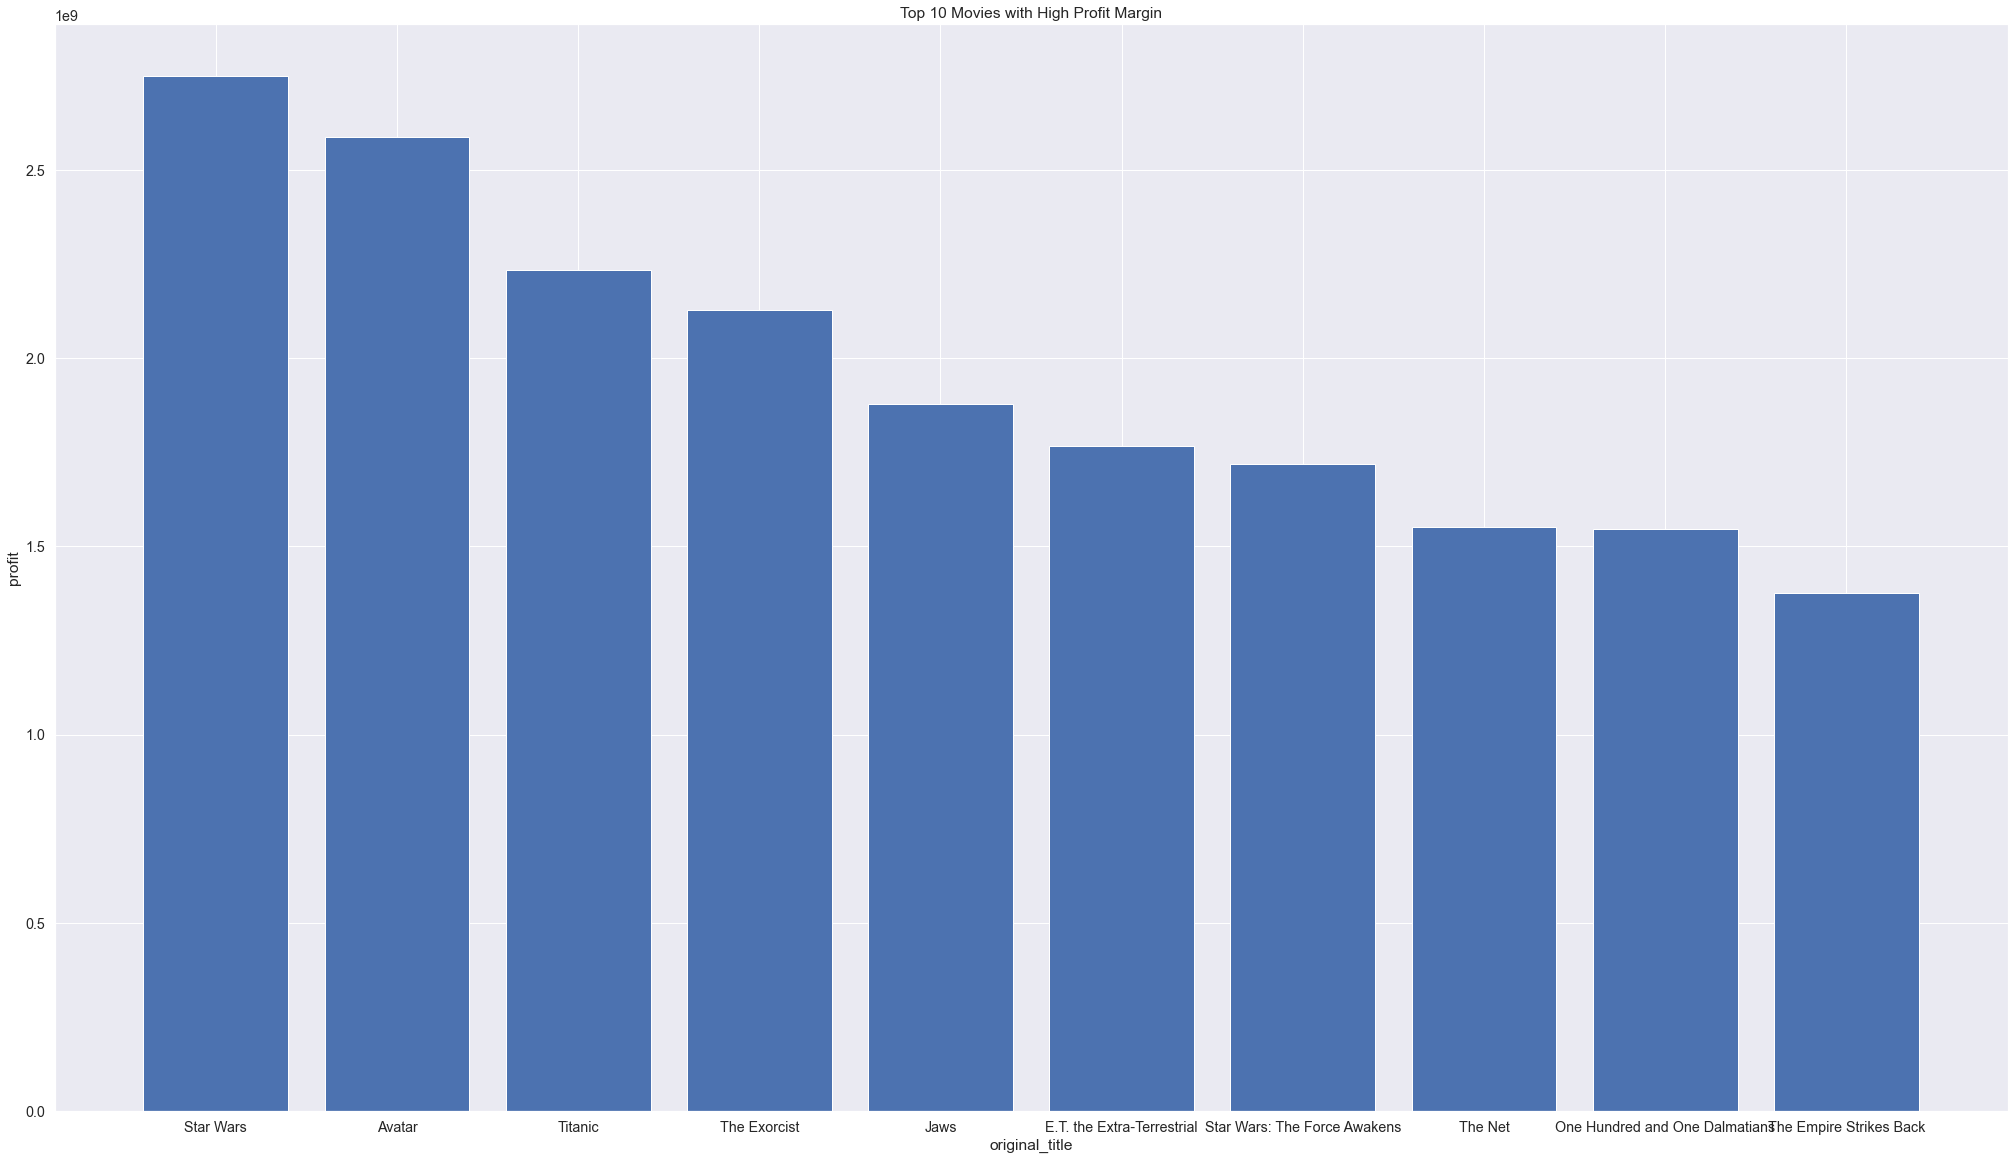

In [44]:
# extracting movies with highest profit margin
top_10_movies = movie_df.sort_values('profit',ascending=False).head(10)
#plotting a barchart to that effect 
fig, ax = plt.subplots(figsize=(35,20)) 
plt.bar(top_10_movies['original_title'], top_10_movies['profit'])
label('original_title', 'profit', 'Top 10 Movies with High Profit Margin')

From the analysis, we can see that star wars is the highest grossing movie as depicted by the height of each bar based on the value of their profit.

# 2. Top 5 Most Released Movie Genre

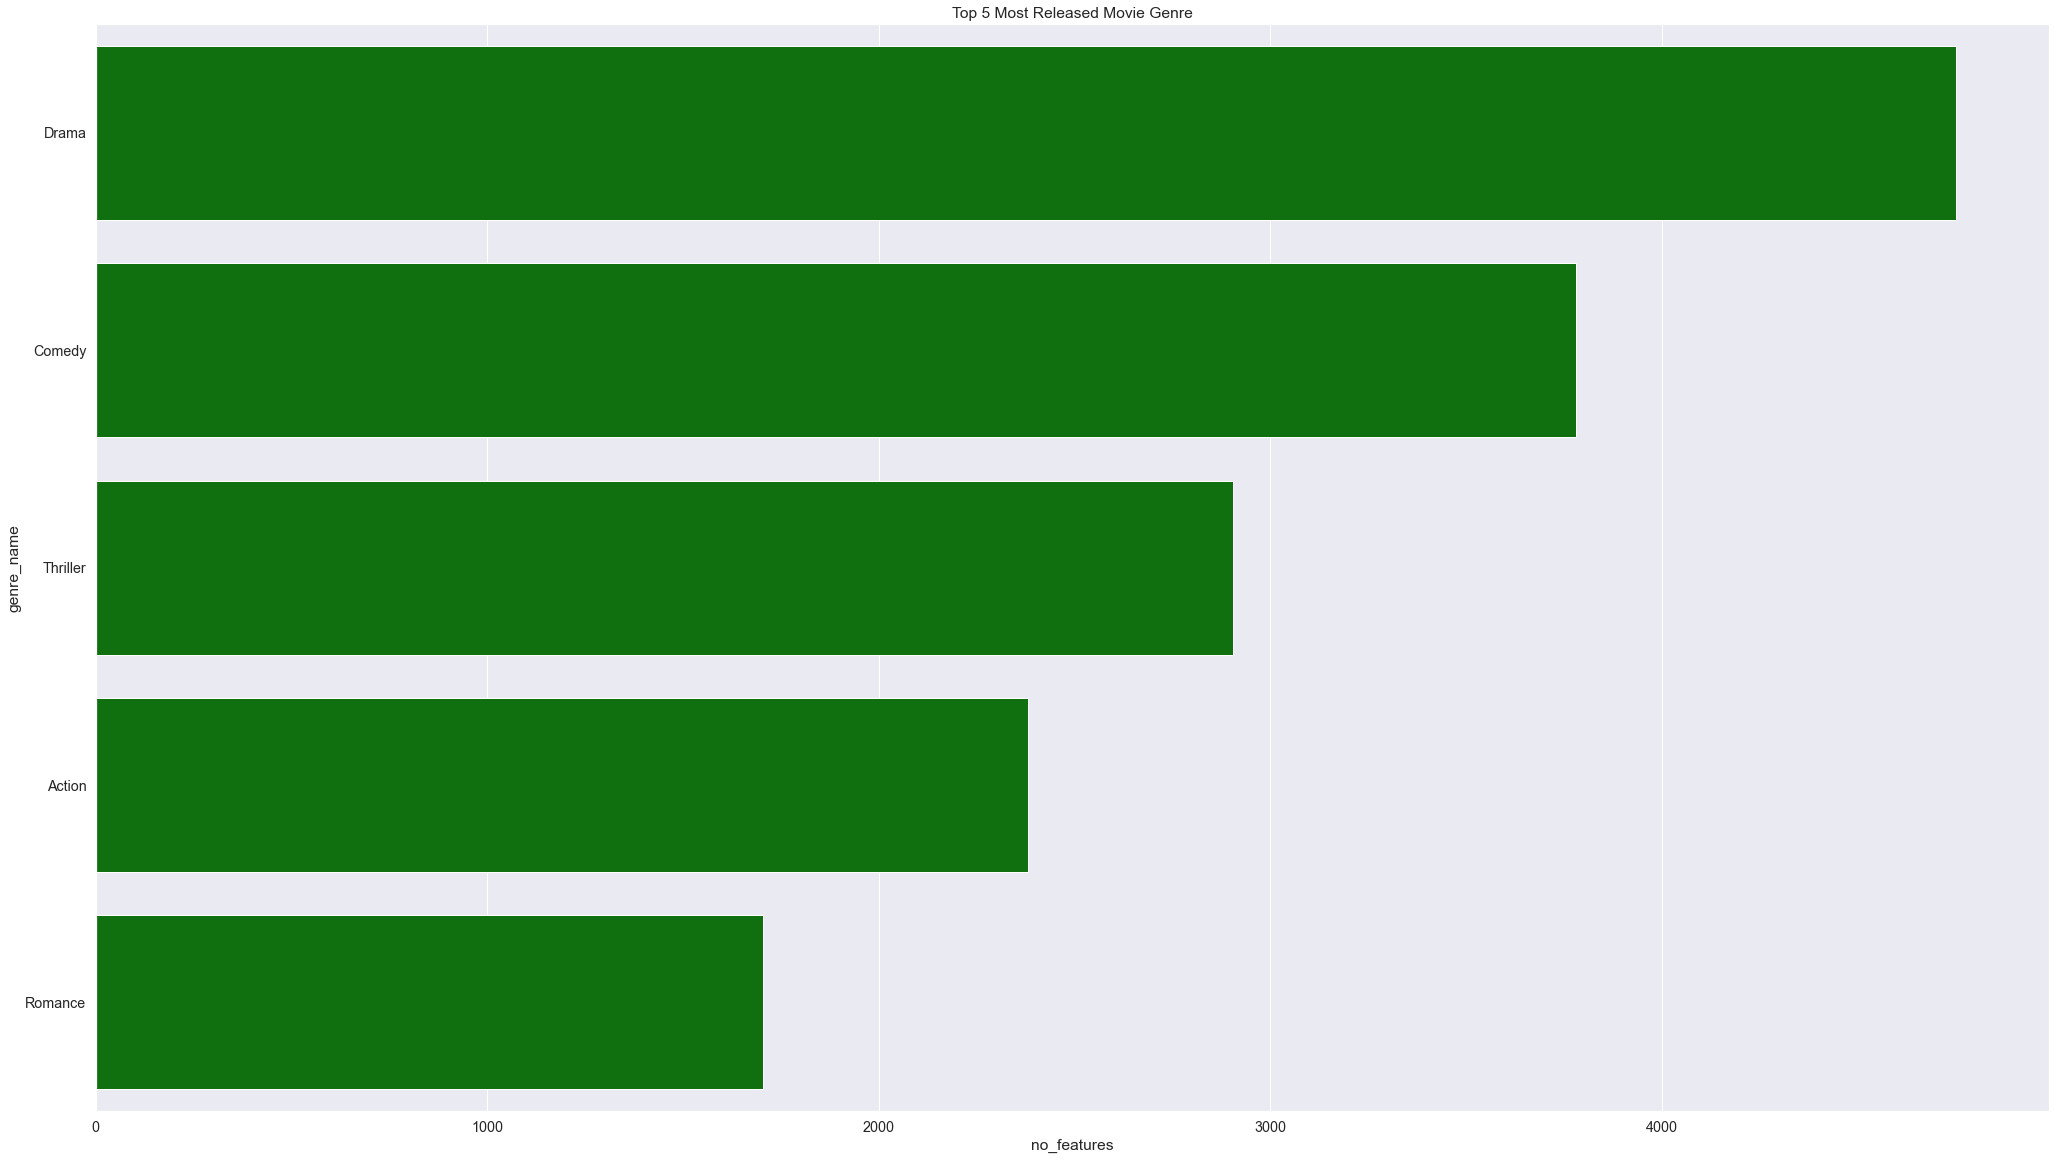

In [92]:
# extracting genres with highest features
genres_rows = cast_rows = [x for x in list(movie_df['genres']) if str(x) != 'nan']
genre_occurences = Counter(list('|'.join(genres_rows).split('|')))
genre_occurences_df = pd.DataFrame(genre_occurences.items(), columns=['genre_name', 'no_features'])
top_5_genre_occurences = genre_occurences_df.sort_values('no_features',ascending=False).head(5)

# plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_features',y = 'genre_name',data = top_5_genre_occurences,ax=ax,color='green')
#plt.bar(top_5_genre_occurences['no_features'], top_5_genre_occurences['genre_name'])
label('no_features', 'genre_name', 'Top 5 Most Released Movie Genre')

From the chart, the most released movie genre is Drama based on the number of times it was featured. 

# 3. Top 5 Cast in number of Features

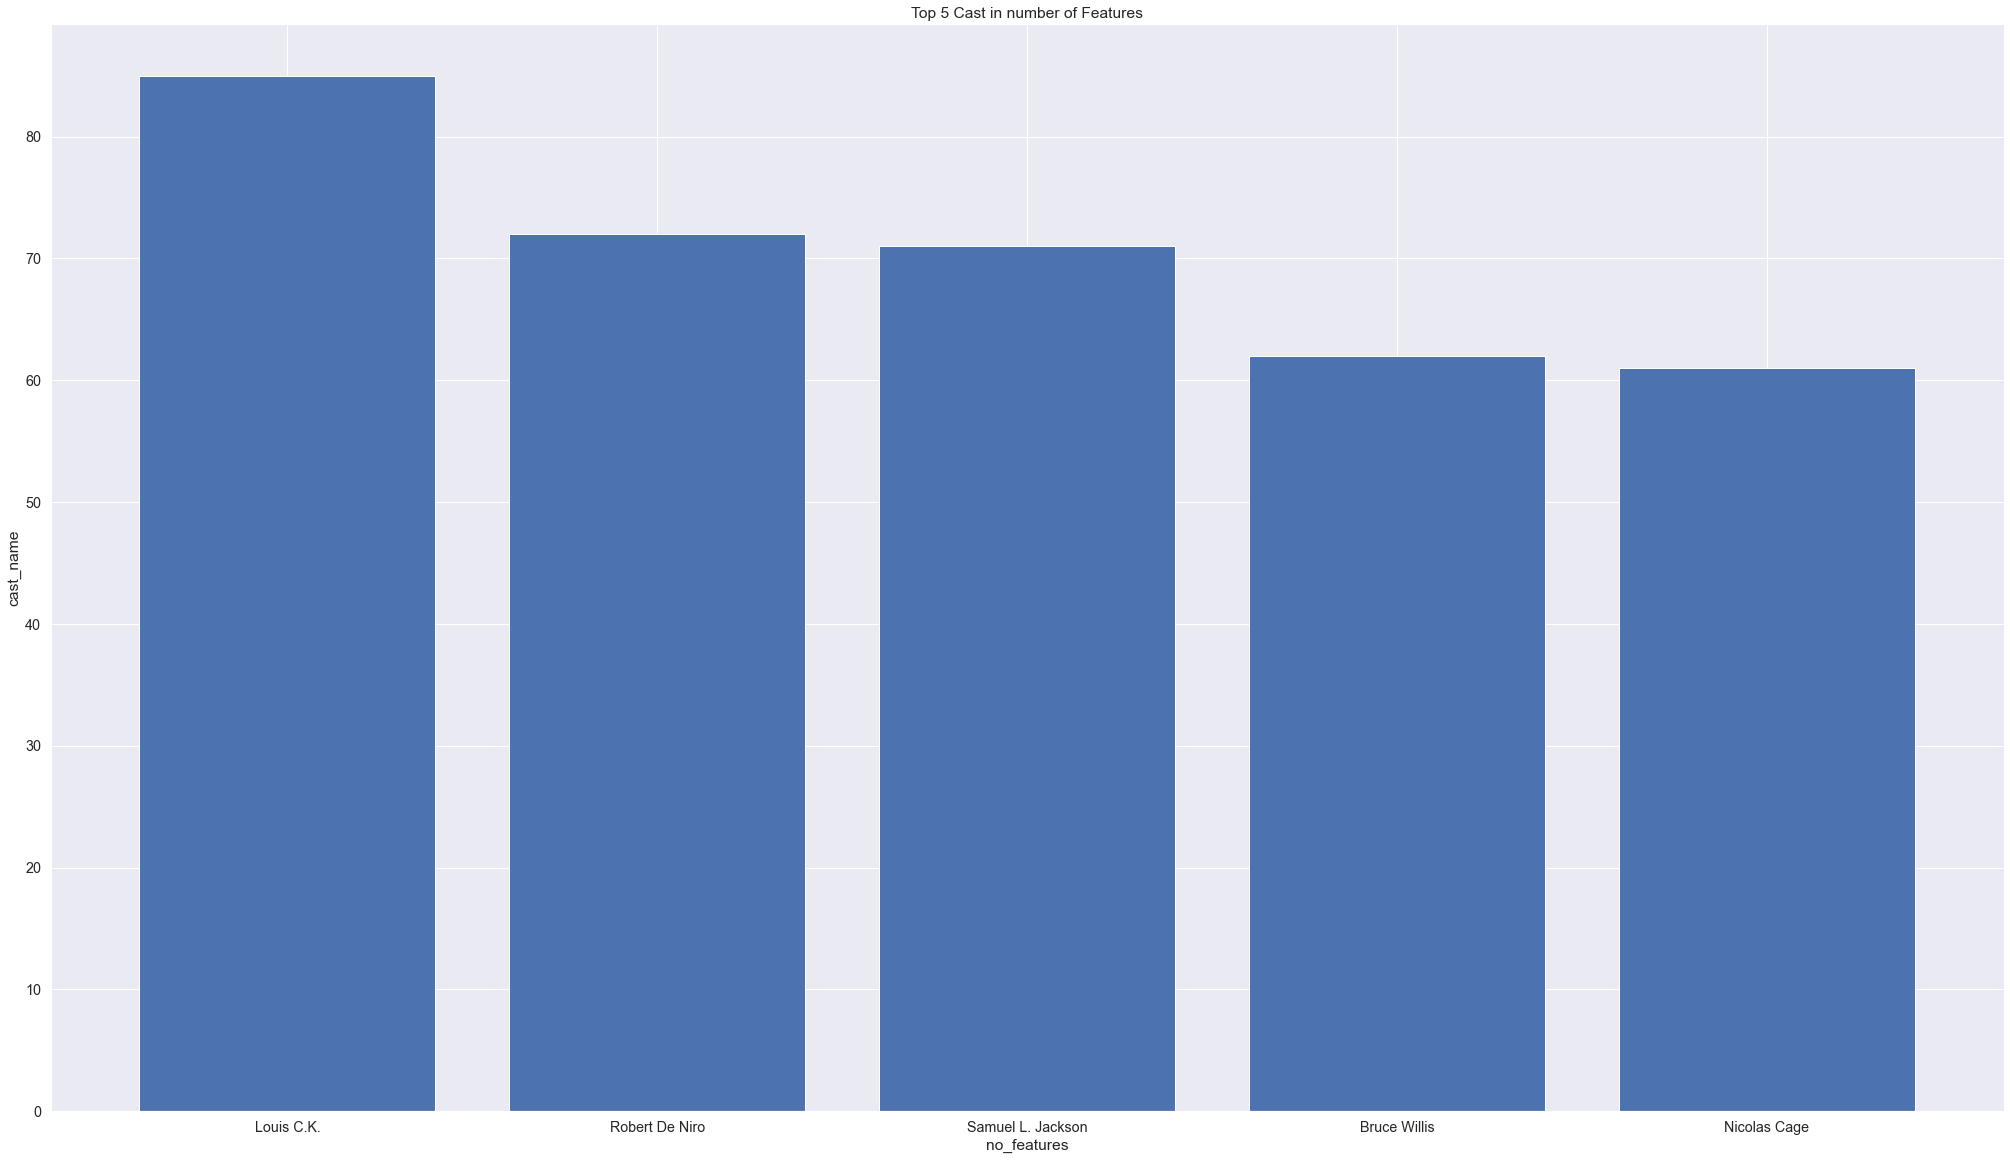

In [91]:
# extracting cast with highest features
cast_rows = [x for x in list(movie_df['cast']) if str(x) != 'nan']
cast_features = Counter(list('|'.join(cast_rows).split('|')))
cast_features_df = pd.DataFrame(cast_features.items(), columns=['cast_name', 'no_features'])
top_5_cast_features = cast_features_df.sort_values('no_features',ascending=False).head(5)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
plt.rcParams.update({'font.size':30})
#b = sns.barplot(x = 'no_features',y = 'cast_name',data = top_5_cast_features,ax=ax,color='Magenta')
plt.bar(top_5_cast_features['cast_name'],top_5_cast_features['no_features'])
label('no_features', 'cast_name', 'Top 5 Cast in number of Features')

From the chart, we can see that Louis C.K had the highest number of feature based on the height of the bar. 

# 4. Top 10 companies With Highest Movie Production

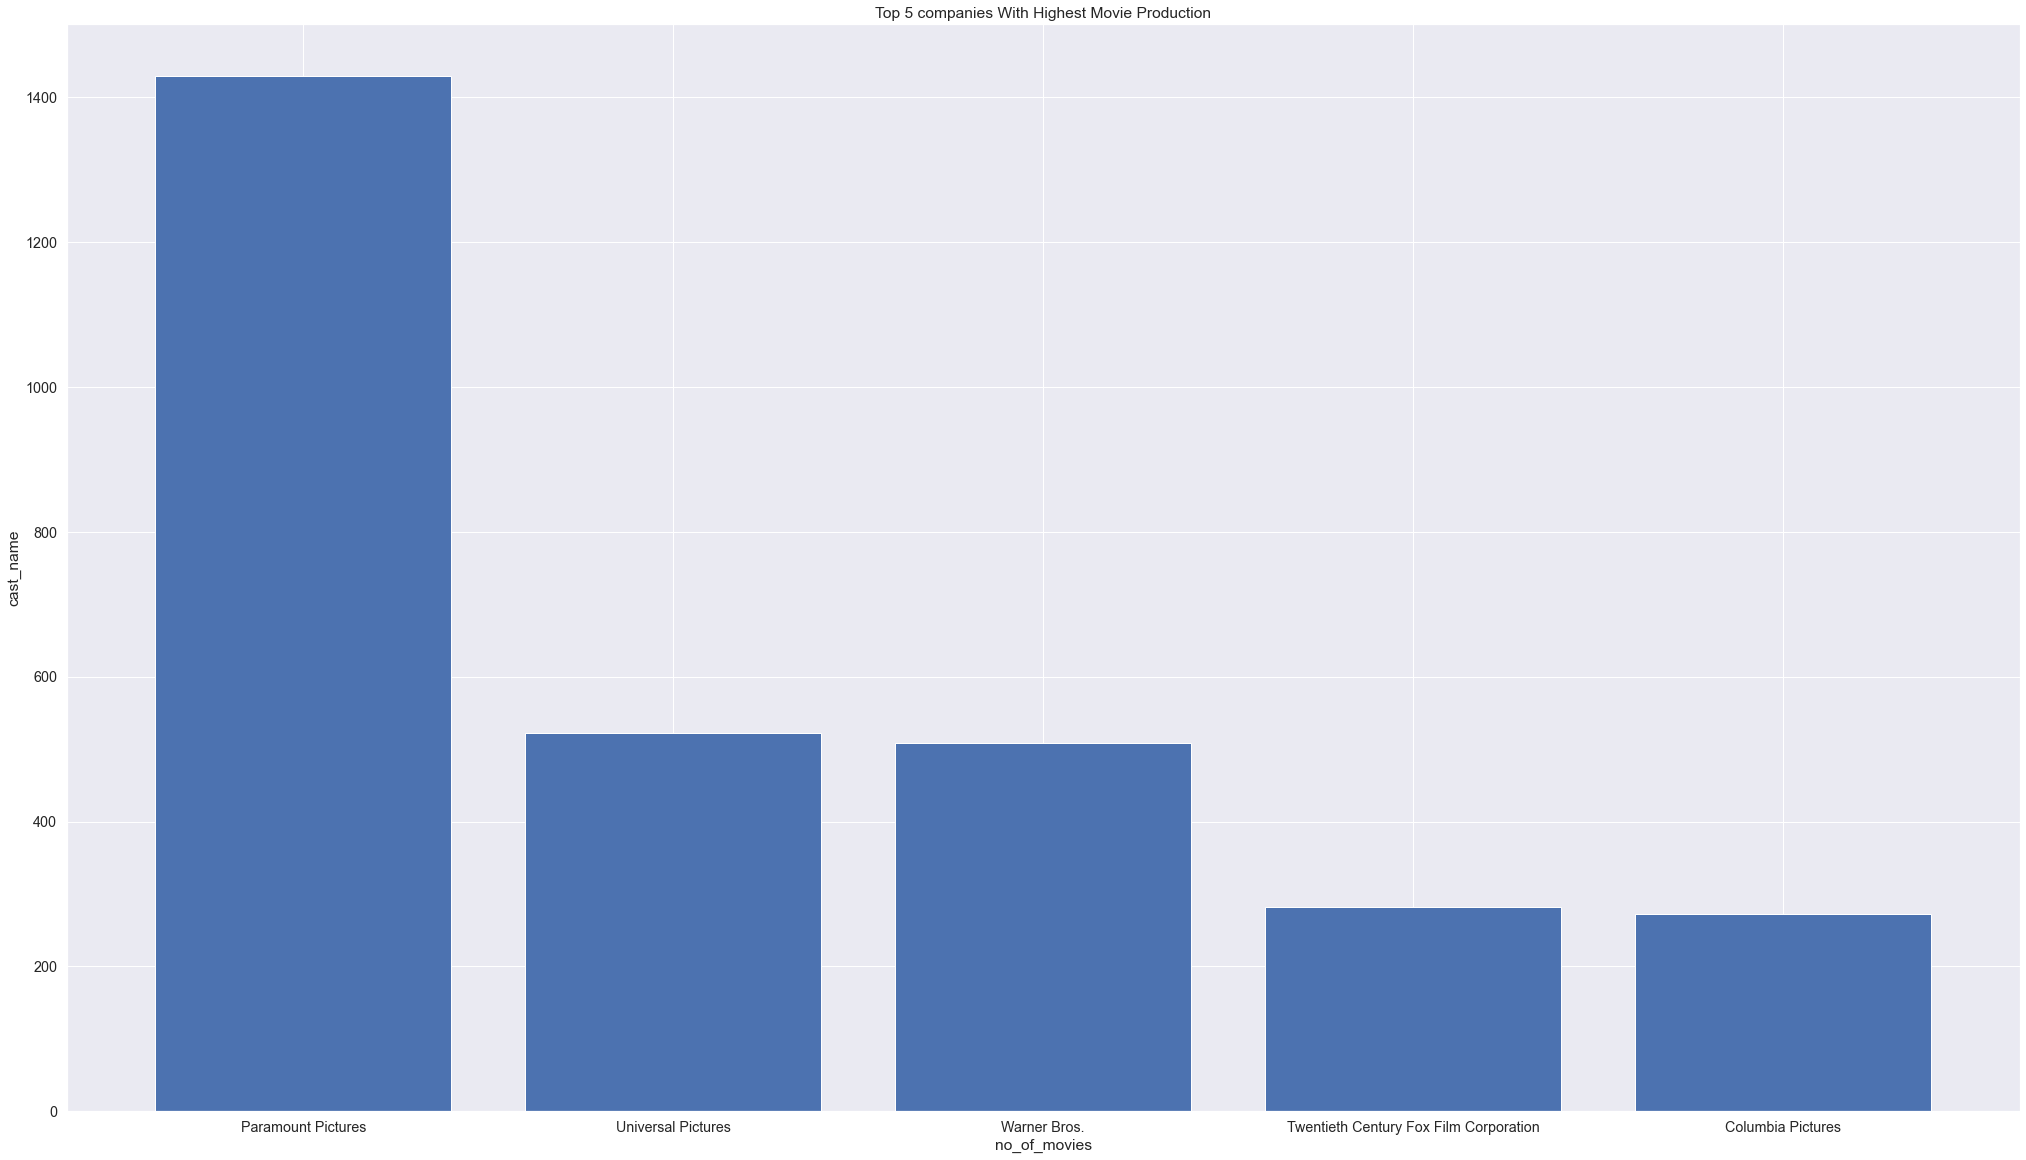

In [102]:
# extracting production companies with the highest movie production
production_companies_rows = [x for x in list(movie_df['production_companies']) if str(x) != 'nan']
production_companies = Counter(list('|'.join(production_companies_rows).split('|')))
production_companies_df = pd.DataFrame(production_companies.items(), columns=['company', 'no_of_movies'])
top_5_production_companies = production_companies_df.sort_values('no_of_movies',ascending=False).head(5)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
#b = sns.barplot(x = 'no_of_movies',y = 'company',data = top_5_production_companies,ax=ax,color='orange')
plt.bar(top_5_production_companies['company'], top_5_production_companies['no_of_movies'])
label('no_of_movies', 'cast_name', 'Top 5 companies With Highest Movie Production')



From the chart, Paramount pictures produced the highest number of movies with the least of the five being columbia pictures.

  # 5. Top 10 Director with the Highest Movie Production

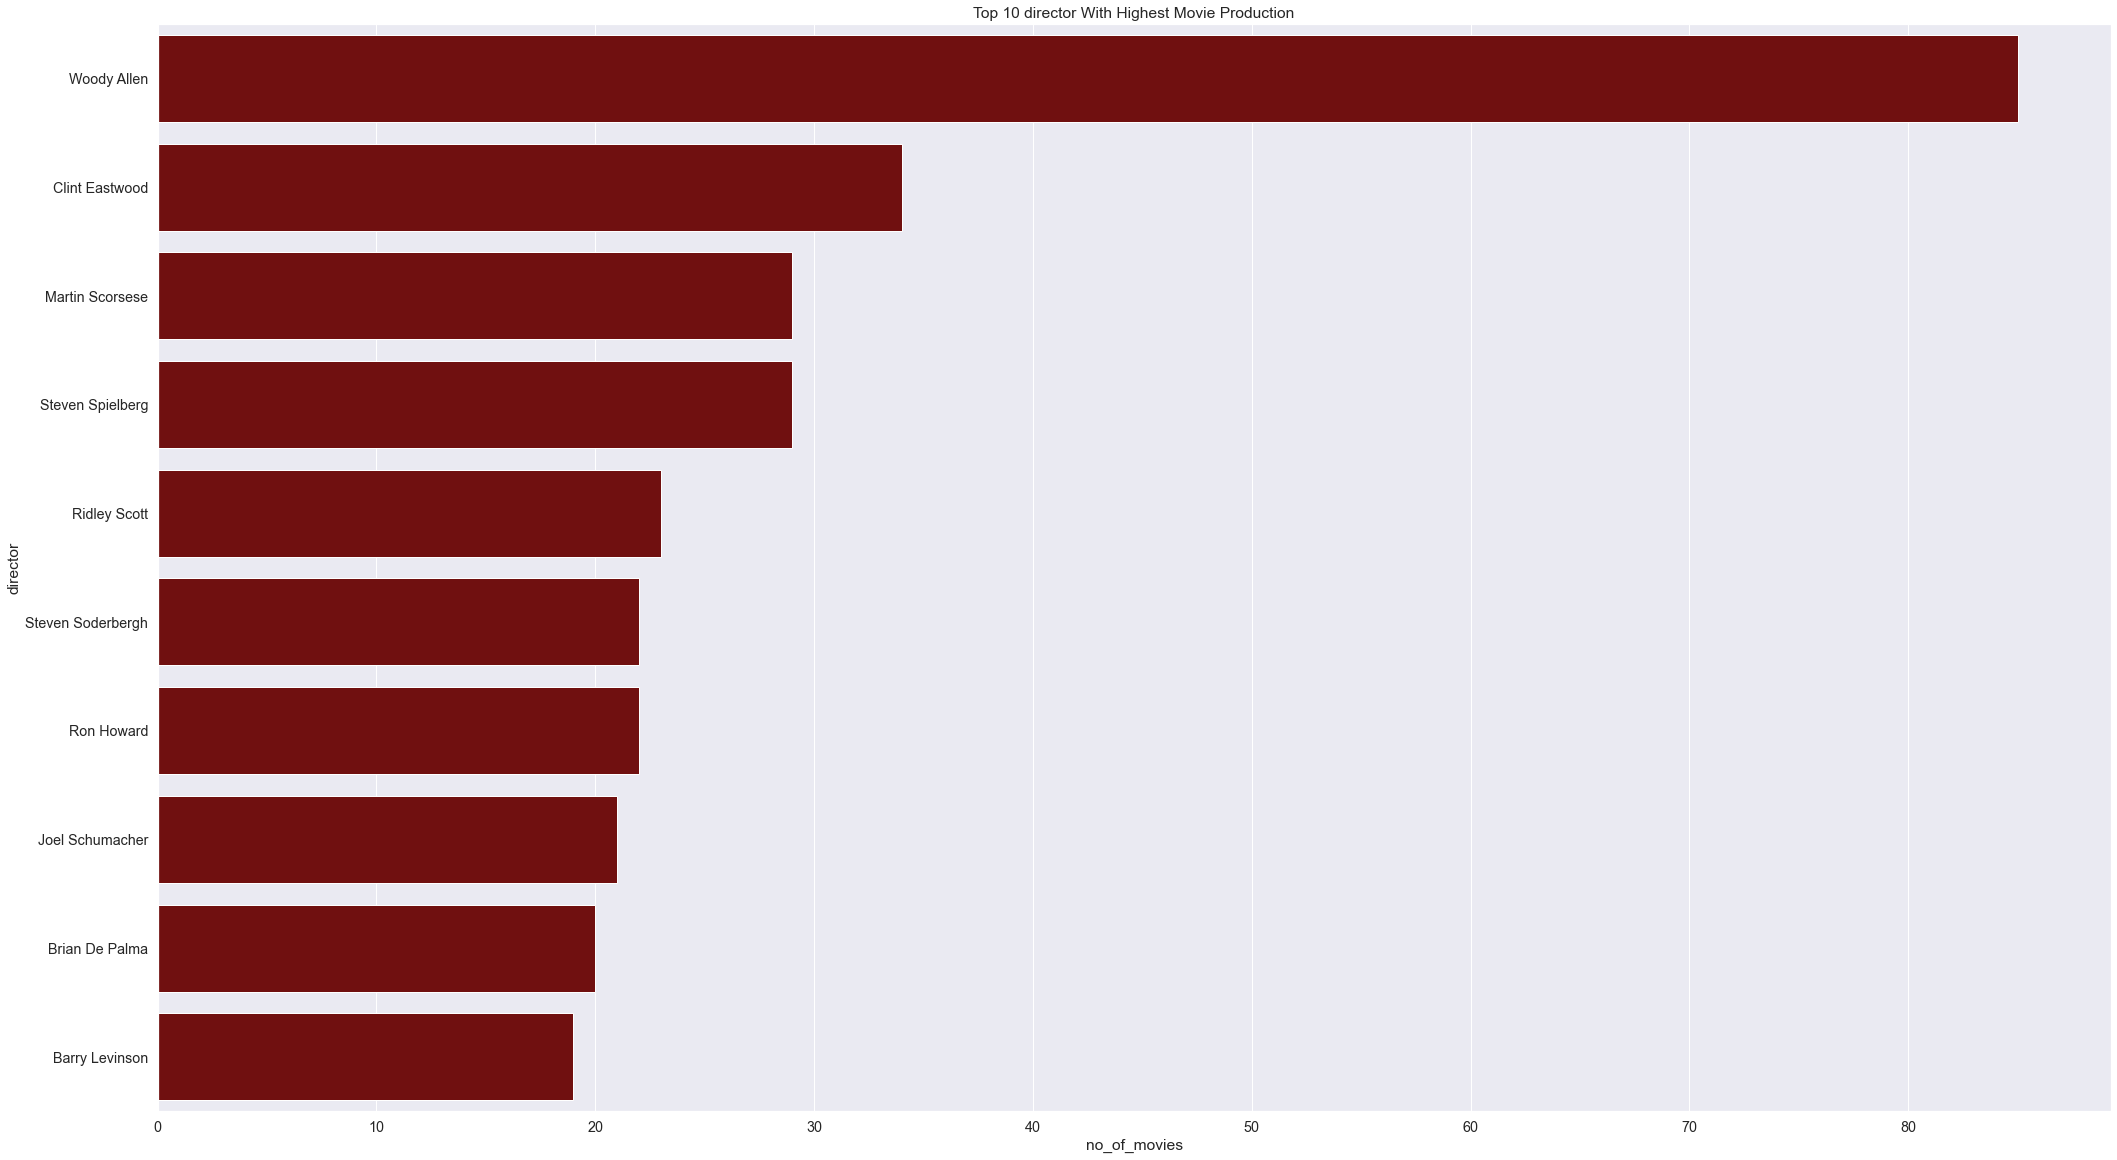

In [99]:
# extracting directors with highest movie production
movie_director = Counter(list(movie_df.director))
movie_director_df = pd.DataFrame(movie_director.items(), columns=['director', 'no_of_movies'])
top_10_movie_director = movie_director_df.sort_values('no_of_movies',ascending=False).head(10)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_of_movies',y = 'director', data = top_10_movie_director, color='Maroon')
#plt.bar(top_10_movie_director['no_of_movies'], top_10_movie_director['director'])
label('no_of_movies', 'director', 'Top 10 director With Highest Movie Production')



From the chart, The director that produced highest number of movies is Woody Allen.

# 6. Top 10 Movies with High Revenue Generation

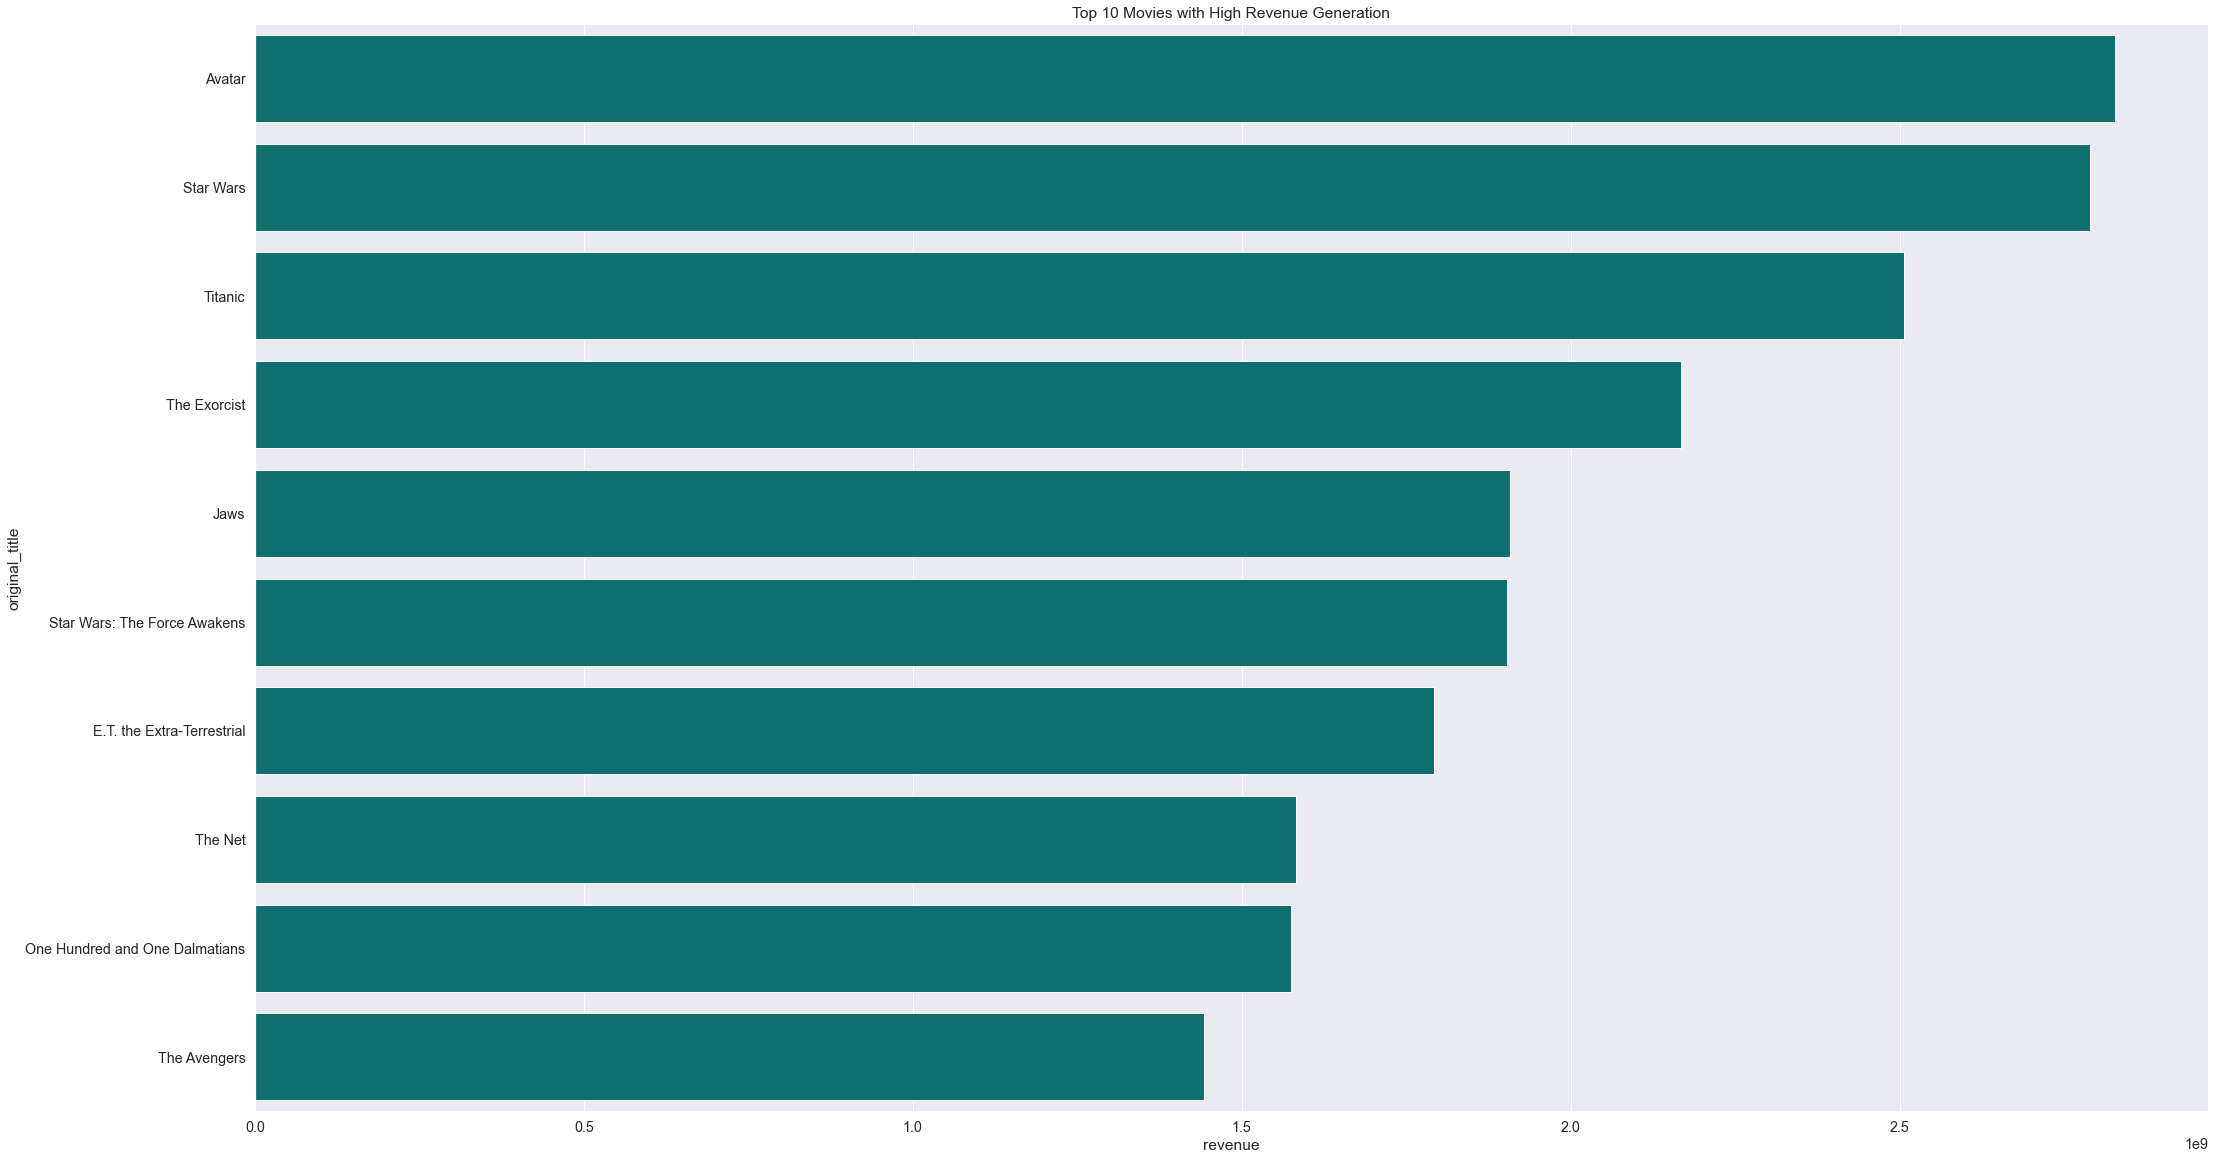

In [100]:
# extracting movies with highest revenue generation
top_10_revenue = movie_df.sort_values('revenue',ascending=False).head(10)

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'revenue',y = 'original_title',data = top_10_revenue,ax=ax,color="Teal")
#plt.bar(top_10_revenue['revenue'], top_10_revenue['original_title'])
label('revenue', 'original_title', 'Top 10 Movies with High Revenue Generation')

From the chart, The movie that generated the highest revenue is Avatar 

# 7. Top 10 Directors that generated the Highest Revenue in term of Movie production

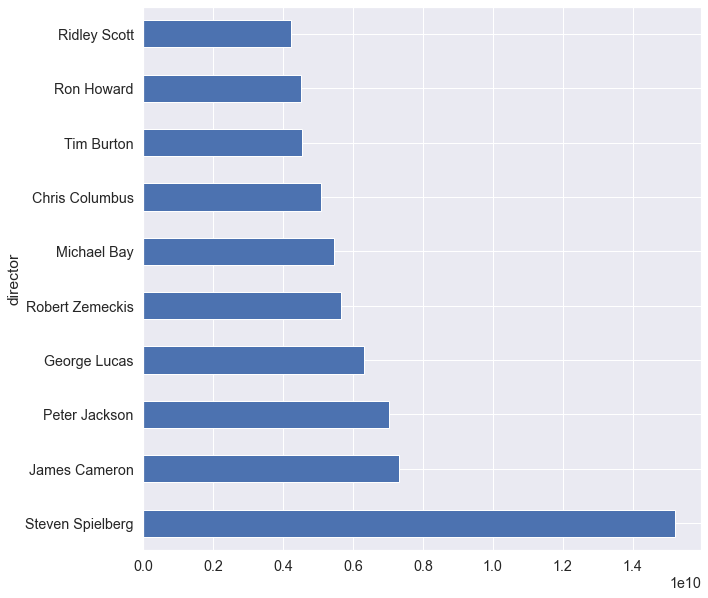

In [109]:
#extracting directors that generated the highest revenue in terms of movie production
fig, ax = plt.subplots(figsize=(10,10)) 
movie_df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot.barh(ax=ax);


From the analysis based on revenue generation Ridley scott topped the chart for the director that directed movies that generated the highest revenue(sum of all movies directed)

# 8. Number of Movies Released across the year 

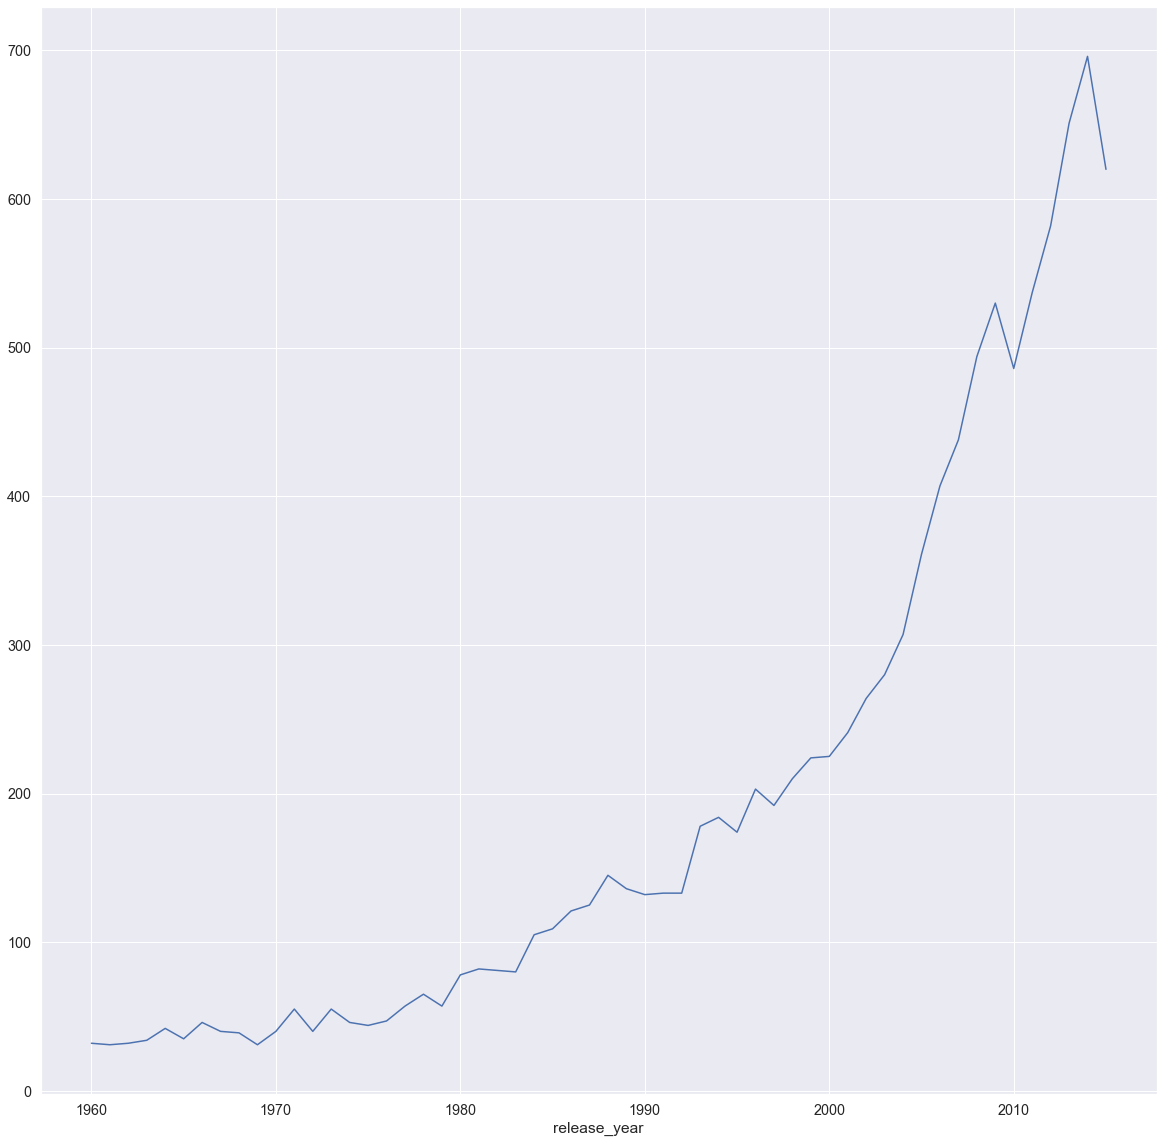

In [39]:
#extracting the number of movies released across the year
fig, ax = plt.subplots(figsize=(20,20)) 
movie_df.groupby('release_year')['release_year'].count().plot(ax=ax);


From the chart above, we see that there is an inrease in profits earned by movies in more recent years as compared to previous years, and the primary reason for this is due to the rapid increase in technology in the movie industry. The rise of the internet has allowed the movie industry to diversity it's portfolio for revenue generation, and so a movie produced with the rise in publicity strategy in this current age would most likely earn more money.

# 9. Top 10 Most Rated Movies

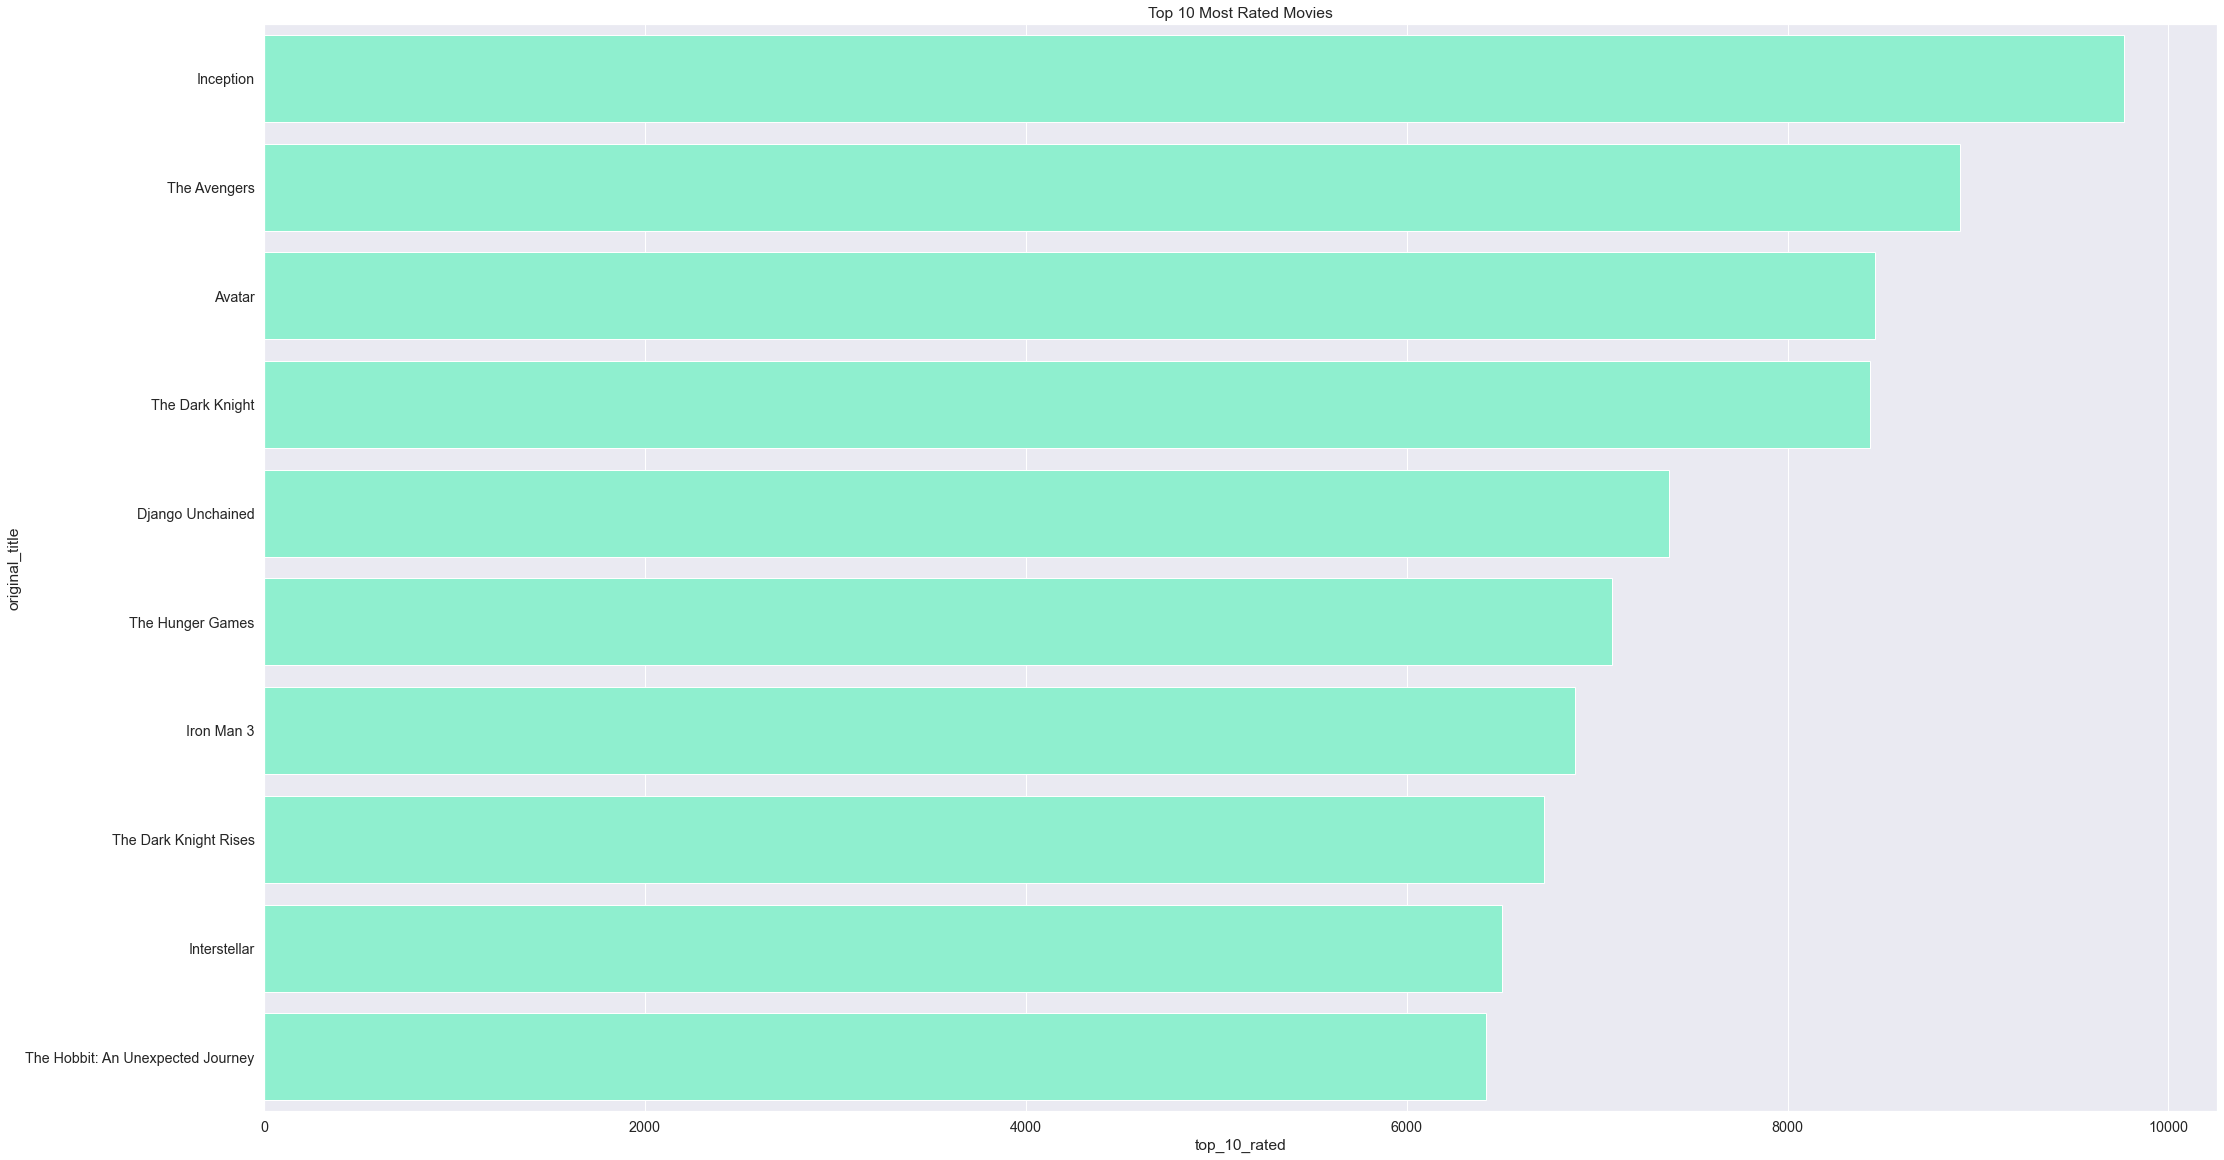

In [108]:
# extracting the most rated movies in terms of vote count
top_10_rated = movie_df.sort_values('vote_count',ascending=False).head(10)

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'vote_count',y = 'original_title',data = top_10_rated, ax=ax,color="aquamarine")
#plt.bar(top_10_rated['vote_count'], top_10_rated['original_title'])
label('top_10_rated', 'original_title', 'Top 10 Most Rated Movies')

From the chart, The most rated movie based on vote count is Inception. 

# 10. Changes in Revenue and Budget Across the years

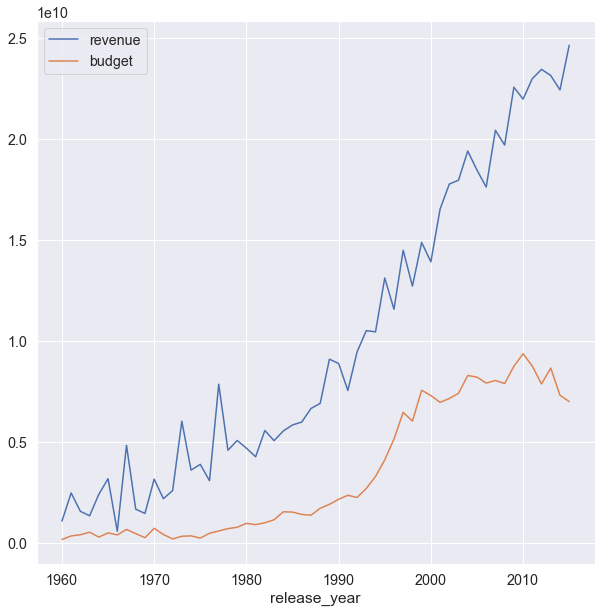

In [41]:
#plotting the changes in revenue and budget across the years
fig, ax = plt.subplots(figsize=(10,10)) 
movie_df.groupby('release_year')[['revenue','budget']].sum().plot(ax=ax);

The analysis made us understand that a progressive increase in budget and revenue of movies produced during this time of the survey was recorded with little budget decline around the later years of the survey.

# Conclusion

1. The movie that generated the highest profit is *Star wars*
2. The Top five most released genre are Drama, Comedy, Thriller, Action, Romance with *Drama* being the highest
3. The cast with the highest feature in movie production is Louis C.K
4. The production company with the highest movie production is *Paramount Pictures* 
5. The Director with the highest movie production is *Woody Allen*
6. In terms of revenue generation for each movie Avatar topped the chart with highest generated revenue during the time period of this survey.
7. The Director that generated the highest revenue in terms of movie production is *Ridley Scott*
8. From the analysis, the amount of movie released increased with a sharp increase between 2000 and 2010 and a little regression was observed around 2013 – 2015.
9. The Most Rated Movie in terms of vote count is *Inception*
10. The analysis made us understand that a progressive increase in budget and revenue of movies produced during this time of the survey was recorded with little budget decline around the later years of the survey.


# Limitations

1. This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. 

2. The data provided to us is most likely not completely corect and up-to-date, hence the insights given is not applicable to all scenarios 

3. The budget and revenue column did not have currency unit, it might be possible different movies have budget in different currency according to the country they are produced in. So a disparity arises here which can state the complete analysis wrong. 

4. Removal of rows with missing values might also have affected the overall analysis.

# References

https://github.com/OLAMIDE100/Udacity-Mantorship-Project/blob/main/investigate-a-dataset-template.ipynb
